## Exercise-1
# Read in the data set `pollutants1.csv` and display the first five rows. 

In [2]:
polltants1_df = pd.read_csv('pollutants1.csv')
print(polltants1_df.head())

   site_id        date    pm10   pm2.5
0  at0ill1  2023-01-01  18.279   16.07
1  at0ill1  2023-01-02  13.359   12.36
2  at0ill1  2023-01-03  11.934  10.135
3  at0ill1  2023-01-04   8.834   7.792
4  at0ill1  2023-01-05   5.947   5.075


In [3]:
# Print the number of rows and columns
print(f'Number of rows are: {polltants1_df.shape[0]}, and columns are: {polltants1_df.shape[1]}')

Number of rows are: 24062, and columns are: 4


Pollutants are measured at specific sites which can be identified via their `site_id`. How many different sites are contained in the data?

In [4]:
print(f'Number of different sites are: {polltants1_df.site_id.nunique()}')

Number of different sites are: 67


## Exercise 2
# Read in the data set `pollutants2.csv` and display the first five values.

In [5]:
# read the pollutants2.csv file
pollutants2_df = pd.read_csv('pollutants2.csv')

#print the first five rows
print(pollutants2_df.head())


   site_id        date pollutant   value
0  at0ill1  2023-01-01       no2   6.234
1  at0ill1  2023-01-02       no2   9.243
2  at0ill1  2023-01-03       no2  17.199
3  at0ill1  2023-01-04       no2   6.280
4  at0ill1  2023-01-05       no2   4.881


Combine both data sets (pollutants1, pollutants2) _suitably_ into one data set. In the combined data, a single row should contain the measurements of all pollutants (`pm10`, `pm2.5`, `no2`, `so2`, `o3`) at one site on one day. Display the first five rows of the combined data and print its row number?

In [6]:
# How to Convert pollutants2_df to Match pollutants1_df
# Pivot long format to wide format
pollutants2_df_pivot = pollutants2_df.pivot_table(
    index=['site_id', 'date'],
    columns='pollutant',
    values='value'
).reset_index()

# Renaming columns for better readability
pollutants2_df_pivot.columns = ['site_id', 'date', 'no2', 'o3', 'so2']

print(pollutants2_df_pivot.head())

   site_id        date     no2      o3    so2
0  at0ill1  2023-01-01   6.234  28.100  0.380
1  at0ill1  2023-01-02   9.243  24.121  0.339
2  at0ill1  2023-01-03  17.199  16.999  0.404
3  at0ill1  2023-01-04   6.280  50.592  0.408
4  at0ill1  2023-01-05   4.881  69.127  0.383


In [7]:
# Merge them
pollutants_df = pd.merge(polltants1_df, pollutants2_df_pivot, on=['site_id', 'date'], how='outer')
print(pollutants_df.head())

   site_id        date    pm10   pm2.5     no2      o3    so2
0  at0ill1  2023-01-01  18.279   16.07   6.234  28.100  0.380
1  at0ill1  2023-01-02  13.359   12.36   9.243  24.121  0.339
2  at0ill1  2023-01-03  11.934  10.135  17.199  16.999  0.404
3  at0ill1  2023-01-04   8.834   7.792   6.280  50.592  0.408
4  at0ill1  2023-01-05   5.947   5.075   4.881  69.127  0.383


## Exercise 3
# Read in the data set `sites.csv` and merge it suitably with the combined data set from exercise 2. Display the first five rows of the merged data set.

In [8]:
sites_df = pd.read_csv('sites.csv')
print(sites_df.head())
# Merge pollutants_df with sites_df
pollutants_df = pd.merge(pollutants_df, sites_df, on='site_id', how='left')
pollutants_df.head()

   site_id                            site  country   site_type  \
0  at0ill1       Illmitz am Neusiedler See  austria  background   
1  at31401               Mödling Bachgasse  austria  background   
2  at32701  Schwechat Sportplatz,Mühlgasse  austria  background   
3  at4s406               Wels Linzerstraße  austria  background   
4  at4s416                  Linz Neue Welt  austria  background   

        site_area  elevation  
0  rural_regional        117  
1        suburban        215  
2        suburban        155  
3        suburban        316  
4        suburban        265  


,site_id,date,pm10,pm2.5,no2,o3,so2,site,country,site_type,site_area,elevation
0,at0ill1,2023-01-01,18.279,16.07,6.234,28.100,0.380,Illmitz am Neusiedler See,austria,background,rural_regional,117.0
1,at0ill1,2023-01-02,13.359,12.36,9.243,24.121,0.339,Illmitz am Neusiedler See,austria,background,rural_regional,117.0
2,at0ill1,2023-01-03,11.934,10.135,17.199,16.999,0.404,Illmitz am Neusiedler See,austria,background,rural_regional,117.0
3,at0ill1,2023-01-04,8.834,7.792,6.280,50.592,0.408,Illmitz am Neusiedler See,austria,background,rural_regional,117.0
4,at0ill1,2023-01-05,5.947,5.075,4.881,69.127,0.383,Illmitz am Neusiedler See,austria,background,rural_regional,117.0


In [9]:
#Does the sites data set contain meta data on all sites that are contained in the combined data set from exercise 2? If not, which sites are missing?
# # Now you can filter rows where site metadata is missing but pollutant data (no2) is available
only_pollutant = pollutants_df[pollutants_df['site'].isna() & pollutants_df['no2'].notna()]

# Remove duplicate site_id values (if multiple entries exist for the same site)
only_pollutant = only_pollutant.drop_duplicates(subset=['site_id'])

# Extract the site_id values
result = only_pollutant['site_id']
result


19795    nl00644
21612    pl0209a
Name: site_id, dtype: object

## Exercise 4
# Of all German sites with `site_type` "traffic" or "background", display the 5 observations with the highest `pm10` values. Display only the relevant columns (site, site_type, date, and pm10).

In [10]:
# Filter the dataset for German sites with 'traffic' or 'background' site types
germany = pollutants_df[pollutants_df['country'] == 'Germany']  # Adjusted to match case-sensitive value in 'country'
germany_site = germany[(germany['site_type'] == 'traffic') | (germany['site_type'] == 'background')].nlargest(5, 'pm10')

# Display the result
print(germany_site)


Empty DataFrame
Columns: [site_id, date, pm10, pm2.5, no2, o3, so2, site, country, site_type, site_area, elevation]
Index: []


In [11]:
#The World Health Organization recommends a maximum yearly average `pm10` value of 15 µg/m³. What is the percentage of sites that exceeds this value?
# Step 1: Count rows where pm10 > 15 µg/m³
exceeds_count = pollutants_df[pollutants_df['pm10'] > 15].shape[0]

# Step 2: Count total rows with non-missing pm10 values
total_rows = pollutants_df[pollutants_df['pm10'].notna()].shape[0]

# Step 3: Calculate the percentage
percentage = (exceeds_count / total_rows) * 100

# Step 4: Display the result
print(f"Percentage of rows exceeding 15 µg/m³ for pm10: {percentage:.2f}%")


Percentage of rows exceeding 15 µg/m³ for pm10: 56.30%


# Exercise 5 (20 points)
Visualize the following patterns related to ozone (`o3`) in the data:

- Calculate the average ozone values per site and use a scatter plot to show how ozone is related to the `elevation` of the site
- Use a line plot to show how ozone immissions at the site "Schauinsland" have developed over time

Arrange both plots as subplots of a single figure. Create a title for the entire figure and titles for each subplot.

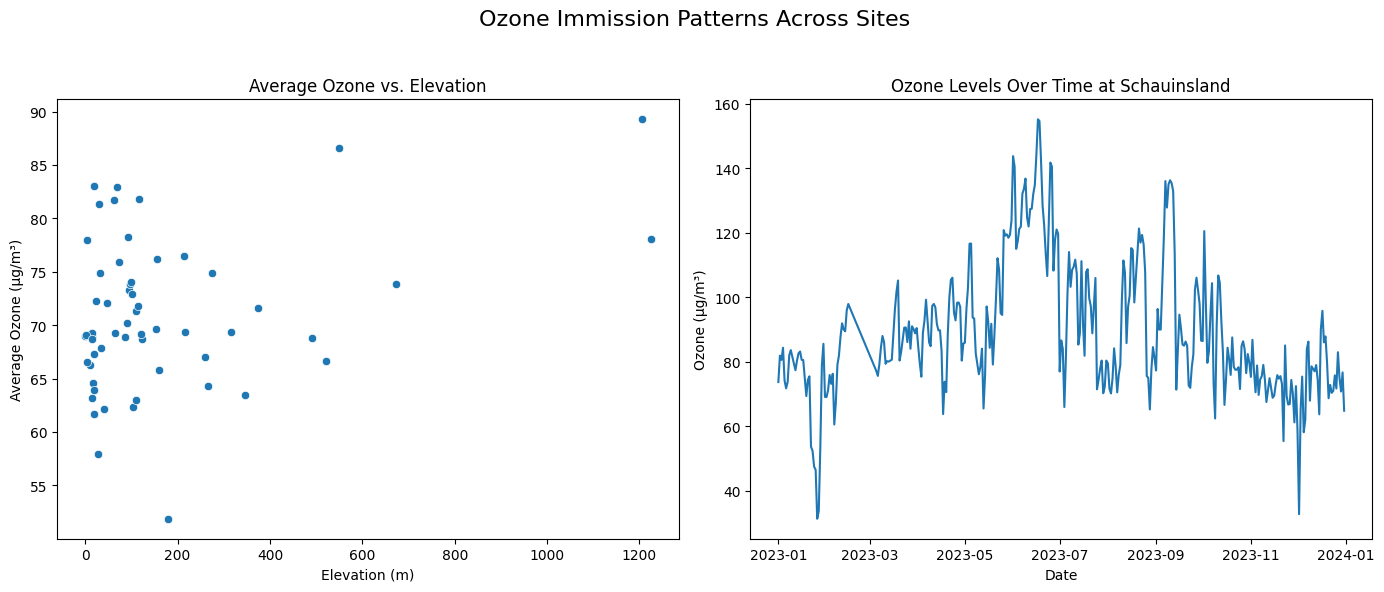

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
pollutants1_df = pd.read_csv('pollutants1.csv')
pollutants2_df = pd.read_csv('pollutants2.csv')
sites_df = pd.read_csv('sites.csv')

# Pivot pollutants2_df to wide format
pollutants2_df_pivot = pollutants2_df.pivot_table(
    index=['site_id', 'date'],
    columns='pollutant',
    values='value'
).reset_index()

# Merge datasets
df_outermerged = pd.merge(pollutants2_df_pivot, pollutants1_df, on=['site_id', 'date'], how='outer')
pollutants_df = pd.merge(df_outermerged, sites_df, on='site_id', how='left')

# Proceed only if 'o3' column exists
if 'o3' in pollutants_df.columns:
    # Convert 'date' to datetime
    pollutants_df['date'] = pd.to_datetime(pollutants_df['date'])

    # 1. Average ozone per site
    avg_o3_per_site = pollutants_df.groupby('site_id')['o3'].mean().reset_index()
    avg_o3_per_site = avg_o3_per_site.merge(sites_df[['site_id', 'elevation']], on='site_id')

    # 2. Ozone trend at "Schauinsland"
    schauinsland = pollutants_df[pollutants_df['site'] == 'Schauinsland'].copy()
    schauinsland = schauinsland.sort_values('date')

    # Plotting
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    # Subplot 1: Average Ozone vs Elevation
    sns.scatterplot(data=avg_o3_per_site, x='elevation', y='o3', ax=axes[0])
    axes[0].set_title('Average Ozone vs. Elevation')
    axes[0].set_xlabel('Elevation (m)')
    axes[0].set_ylabel('Average Ozone (µg/m³)')

    # Subplot 2: Ozone trend at Schauinsland
    sns.lineplot(data=schauinsland, x='date', y='o3', ax=axes[1])
    axes[1].set_title('Ozone Levels Over Time at Schauinsland')
    axes[1].set_xlabel('Date')
    axes[1].set_ylabel('Ozone (µg/m³)')

    # Main title and layout
    fig.suptitle('Ozone Immission Patterns Across Sites', fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

else:
    print("⚠️ Column 'o3' not found in the data. Please ensure ozone data is available.")


# Exercise 6 (15 points)
Display for all sites in Hamburg the average value of `pm10`, `pm2.5` and `no2`. Hint: consider all sites that contain "Hamburg" in the site name.

In [16]:
print(pollutants_df.head())
number_hamburg_sites = df[df.site.str.contains("Hamburg",case=False, na=False)]
number_hamburg_sites

   site_id       date     no2      o3    so2    pm10   pm2.5  \
0  at0ill1 2023-01-01   6.234  28.100  0.380  18.279   16.07   
1  at0ill1 2023-01-02   9.243  24.121  0.339  13.359   12.36   
2  at0ill1 2023-01-03  17.199  16.999  0.404  11.934  10.135   
3  at0ill1 2023-01-04   6.280  50.592  0.408   8.834   7.792   
4  at0ill1 2023-01-05   4.881  69.127  0.383   5.947   5.075   

                        site  country   site_type       site_area  elevation  
0  Illmitz am Neusiedler See  austria  background  rural_regional      117.0  
1  Illmitz am Neusiedler See  austria  background  rural_regional      117.0  
2  Illmitz am Neusiedler See  austria  background  rural_regional      117.0  
3  Illmitz am Neusiedler See  austria  background  rural_regional      117.0  
4  Illmitz am Neusiedler See  austria  background  rural_regional      117.0  


,site_id,date,no2,o3,so2,pm10,pm2.5,site,country,site_type,site_area,elevation
5822,dehh008,2023-01-01,11.968,69.289,2.500,17.445,10.374,Hamburg Sternschanze,germany,background,urban,15.0
5823,dehh008,2023-01-02,14.306,54.668,3.062,9.876,5.144,Hamburg Sternschanze,germany,background,urban,15.0
5824,dehh008,2023-01-03,25.683,53.505,2.724,14.231,5.78,Hamburg Sternschanze,germany,background,urban,15.0
5825,dehh008,2023-01-04,14.277,64.338,2.631,6.447,2.436,Hamburg Sternschanze,germany,background,urban,15.0
5826,dehh008,2023-01-05,19.389,67.546,2.906,9.848,3.323,Hamburg Sternschanze,germany,background,urban,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6899,dehh068,2023-12-27,37.279,NaN,NaN,14.516,7.171,Hamburg Habichtstraße,germany,traffic,urban,12.0
6900,dehh068,2023-12-28,22.617,NaN,NaN,13.205,6.815,Hamburg Habichtstraße,germany,traffic,urban,12.0
6901,dehh068,2023-12-29,24.463,NaN,NaN,10.862,5.613,Hamburg Habichtstraße,germany,traffic,urban,12.0
6902,dehh068,2023-12-30,26.185,NaN,NaN,11.887,6.383,Hamburg Habichtstraße,germany,traffic,urban,12.0


In [17]:
number_hamburg_sites[['pm10','pm2.5','no2']].mean(numeric_only=True)

pm10    15.565388
no2     24.648383
dtype: float64